In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("new_insurance_data (1).csv")
df.head()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


Here charges column is target or dependent column

In [3]:
df.columns#list of all colums

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [4]:
df.shape

(1338, 13)

In [5]:
df.info()#we have 3 colums in which datatype is an object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

Missing value Analysis

In [26]:
df.isnull().sum()

age                                 0
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

<AxesSubplot:>

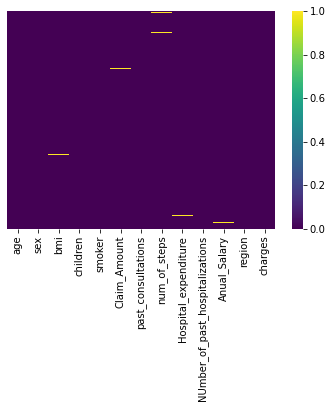

In [25]:
#Visualization of null values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [34]:
col_num=list(df.columns)
col_num.remove("charges")#since charge is the target column
col_num

['age',
 'sex',
 'bmi',
 'children',
 'smoker',
 'Claim_Amount',
 'past_consultations',
 'num_of_steps',
 'Hospital_expenditure',
 'NUmber_of_past_hospitalizations',
 'Anual_Salary',
 'region']

In [38]:
#if dtype is object we fill null values with mode else with mean
for i in col_num:
    if df[i].dtypes=="object":
        df[i]=df[i].fillna(df[i].mode())
    else:
        df[i]=df[i].fillna(df[i].mean())

In [39]:
df.isnull().sum()#all null values are removed

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

# Categorical value conversion

In [41]:
#1)sex column has 2 categorical value 
df["sex"]=np.where(df["sex"]=="male",1,0)
df["sex"]=df["sex"].astype(int)
df["sex"].head()

0    0
1    0
2    0
3    0
4    0
Name: sex, dtype: int32

In [43]:
#2)Label Encoding to assign values to different labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["smoker"]=le.fit_transform(df["smoker"])
df["smoker"]=df["smoker"].astype(int)
df["smoker"].head()

0    0
1    0
2    0
3    0
4    0
Name: smoker, dtype: int32

In [45]:
#3)One-hot encoding is an important step for preparing your dataset for use in machine learning. One-hot encoding turns your categorical data into a binary vector representation.
#using pd.get_dummies,used mostly in decision tree and SVM algorithm
#This means that for each unique value in a column, a new column is created. The values in this column are represented as 1s and 0s, depending on whether the value matches the column header.

In [ ]:
region=pd.get_dummies(df["region"],drop_first=False)
region

In [55]:
#df.drop("region",axis=1,inplace=False)
df=pd.concat([df,region],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1338 non-null   float64
 1   sex                              1338 non-null   int32  
 2   bmi                              1338 non-null   float64
 3   children                         1338 non-null   float64
 4   smoker                           1338 non-null   int32  
 5   Claim_Amount                     1338 non-null   float64
 6   past_consultations               1338 non-null   float64
 7   num_of_steps                     1338 non-null   float64
 8   Hospital_expenditure             1338 non-null   float64
 9   NUmber_of_past_hospitalizations  1338 non-null   float64
 10  Anual_Salary                     1338 non-null   float64
 11  charges                          1338 non-null   float64
 12  northeast           

# Data Visualization

C:\Users\Farheen Hussain\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


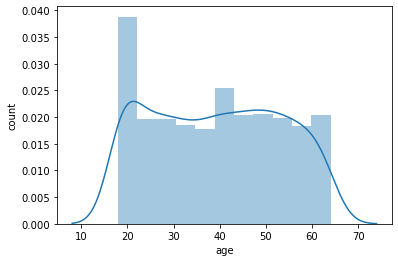

In [56]:
sns.distplot(x=df["age"])#age feature doesnot follow normal distribution
plt.xlabel("age")
plt.ylabel("count")
plt.show()

C:\Users\Farheen Hussain\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


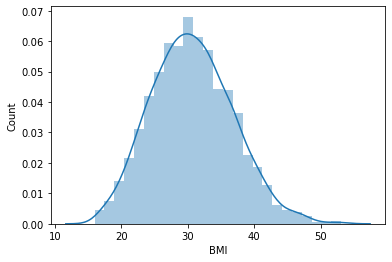

In [8]:
sns.distplot(x=df['bmi'])#follows normal distribution
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

C:\Users\Farheen Hussain\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


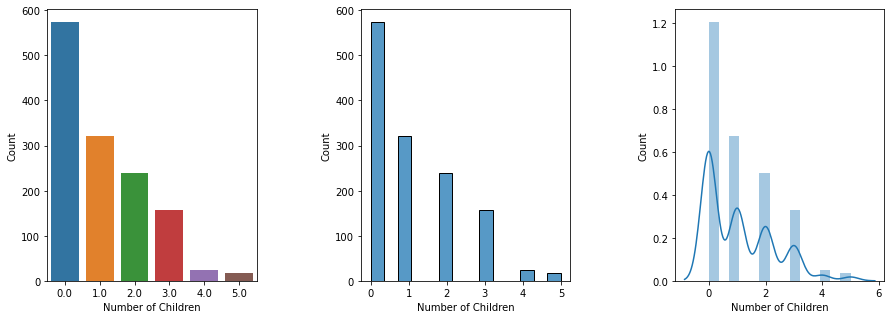

In [9]:
plt.subplots(1,3, figsize=(15,5))# 1 row and 3 column
plt.subplot(1,3,1)#1st plot
sns.countplot(x=df['children'])#for discrete value we have countplot or barplot to visualize
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,2)
sns.histplot(x=df['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')


plt.subplot(1,3,3)
sns.distplot(x=df['children'])
plt.xlabel('Number of Children')
plt.ylabel('Count')

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

C:\Users\Farheen Hussain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


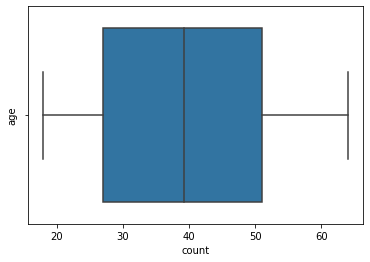

C:\Users\Farheen Hussain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


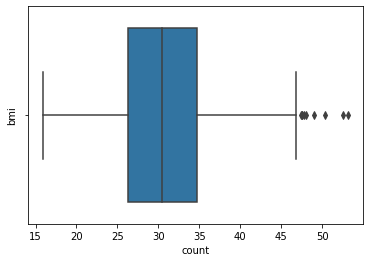

C:\Users\Farheen Hussain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


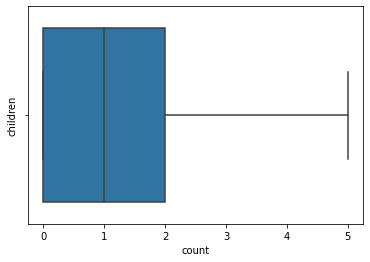

C:\Users\Farheen Hussain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


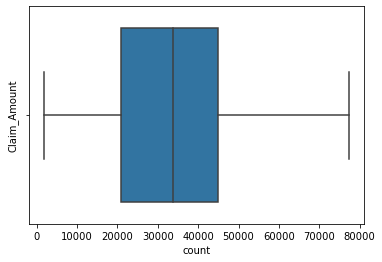

C:\Users\Farheen Hussain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


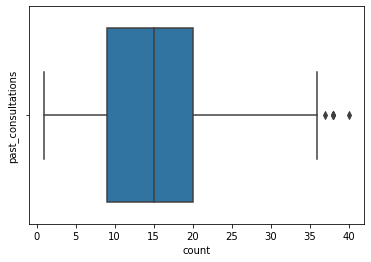

C:\Users\Farheen Hussain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


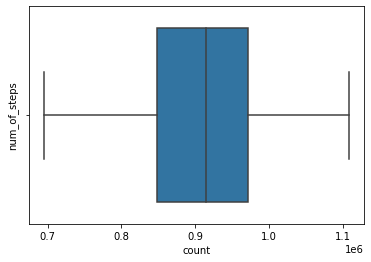

C:\Users\Farheen Hussain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


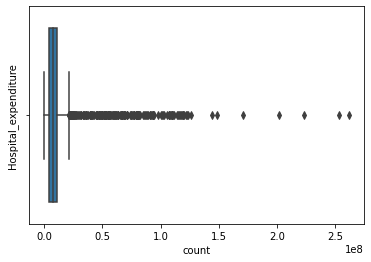

C:\Users\Farheen Hussain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


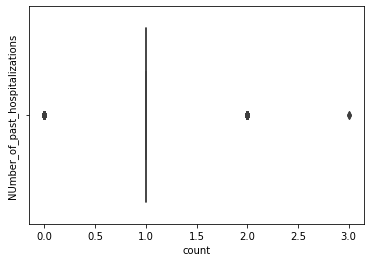

C:\Users\Farheen Hussain\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


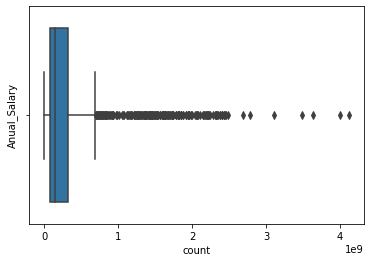

In [72]:
#5 number summary of all features to identify outliers
for i in col_num:
    if(df[i].dtypes=="float64" or df[i].dtypes=="int64"):
        sns.boxplot(df[i])
        plt.xlabel("count")
        plt.ylabel(i)
        plt.show()

# IQR method
Now with the IQR method we will be removing the outlier

The interquartile range is calculated in much the same way as the range. All you do to find it is subtract the first quartile from the third quartile: IQR = Q3 – Q1. The interquartile range shows how the data is spread about the median

(data >= Q1 - 1.5IQR) & (data <= Q3 + 1.5IQR)

Where 1.5 is standard range set to check the outliers

So with the help of above formula and IQR value we can remove the outliers ,to remove the outliers we have to calculate the values within upper and lower limit

IQR=Q3-Q1

lower limit=Q1-1.5*IQR

upper limit=Q3+1.5*IQR

so consider for age column

Q1 = data.age.quantile(0.25)

Q3 = data.age.quantile(0.75)

IQR = Q3 - Q1

print(Q1-1.5IQR,Q3+1.5IQR)

(9.5 , 69.5)

so we'll consider values between (9.5 , 69.5) and rest all values will be outliers.

Same follows for all  columns having outliers

In [74]:
#feature having outlier(bmi,past_consultations,Hospital_expenditure,NUmber_of_past_hospitalizations,Annual_Salary)
#Removal of outliers
Q1 = df.bmi.quantile(0.25)
Q3 = df.bmi.quantile(0.75)
IQR = Q3-Q1
df = df[(df.bmi>=Q1-1.5*IQR) & (df.bmi<= Q3+1.5*IQR)]

Q1 = df.past_consultations.quantile(0.25)
Q3 = df.past_consultations.quantile(0.75)
IQR = Q3-Q1
df = df[(df.past_consultations>=Q1-1.5*IQR) & (df.past_consultations<= Q3+1.5*IQR)]

Q1 = df.Hospital_expenditure.quantile(0.25)
Q3 = df.Hospital_expenditure.quantile(0.75)
IQR = Q3-Q1
df = df[(df.Hospital_expenditure>=Q1-1.5*IQR) & (df.Hospital_expenditure<= Q3+1.5*IQR)]

Q1 = df.NUmber_of_past_hospitalizations.quantile(0.25)
Q3 = df.NUmber_of_past_hospitalizations.quantile(0.75)
IQR = Q3-Q1
df = df[(df.NUmber_of_past_hospitalizations>=Q1-1.5*IQR) & (df.NUmber_of_past_hospitalizations<= Q3+1.5*IQR)]

Q1 = df.Anual_Salary.quantile(0.25)
Q3 = df.Anual_Salary.quantile(0.75)
IQR = Q3-Q1
df = df[(df.Anual_Salary>=Q1-1.5*IQR) & (df.Anual_Salary<= Q3+1.5*IQR)]


In [75]:
df.corr()

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges,northeast,northwest,southeast,southwest,northeast,northwest,southeast,southwest
age,1.000000,NaN,0.185655,-0.144587,-0.289851,0.076328,0.136426,0.661572,0.131621,NaN,0.424402,0.570182,-0.028533,-0.030257,0.011234,0.047990,-0.028533,-0.030257,0.011234,0.047990
sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.185655,NaN,1.000000,0.009175,-0.227869,-0.003493,-0.009061,0.042105,0.013566,NaN,0.002150,0.006532,-0.156866,-0.131593,0.253097,0.042508,-0.156866,-0.131593,0.253097,0.042508
children,-0.144587,NaN,0.009175,1.000000,-0.070566,0.006375,-0.002902,-0.006231,-0.064394,NaN,-0.063567,-0.046717,-0.046026,-0.005463,0.029365,0.022743,-0.046026,-0.005463,0.029365,0.022743
smoker,-0.289851,NaN,-0.227869,-0.070566,1.000000,0.131893,0.120502,0.347580,0.262903,NaN,0.496946,0.467428,0.051460,-0.026626,0.011347,-0.035419,0.051460,-0.026626,0.011347,-0.035419
Claim_Amount,0.076328,NaN,-0.003493,0.006375,0.131893,1.000000,0.051717,0.175158,0.033503,NaN,0.143783,0.170001,-0.046294,0.056568,-0.006778,-0.004376,-0.046294,0.056568,-0.006778,-0.004376
past_consultations,0.136426,NaN,-0.009061,-0.002902,0.120502,0.051717,1.000000,0.248848,0.087314,NaN,0.242713,0.253934,-0.037224,0.001429,0.031158,0.005283,-0.037224,0.001429,0.031158,0.005283
num_of_steps,0.661572,NaN,0.042105,-0.006231,0.347580,0.175158,0.248848,1.000000,0.320769,NaN,0.826766,0.956343,0.049288,-0.050882,-0.003178,0.005351,0.049288,-0.050882,-0.003178,0.005351
Hospital_expenditure,0.131621,NaN,0.013566,-0.064394,0.262903,0.033503,0.087314,0.320769,1.000000,NaN,0.361384,0.364286,0.030685,-0.081296,-0.023498,0.074333,0.030685,-0.081296,-0.023498,0.074333
NUmber_of_past_hospitalizations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#removal of multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if  (col != 'charges'):
        col_list.append(col)
    
X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data


C:\Users\Farheen Hussain\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Farheen Hussain\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Farheen Hussain\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,age,4.566099
1,sex,NaN
2,bmi,1.182717
3,children,1.174156
4,smoker,3.123209
5,Claim_Amount,1.046857
6,past_consultations,1.075631
7,num_of_steps,6.952728
8,Hospital_expenditure,1.183445
9,NUmber_of_past_hospitalizations,0.000000


In [90]:
df=df.drop(["num_of_steps"],axis=1)#VIF<=6 else drop that column

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in df.columns:
    if  (col != 'charges'):
        col_list.append(col)
    
X = df[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data


C:\Users\Farheen Hussain\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Farheen Hussain\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Farheen Hussain\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,age,2.185868
1,sex,NaN
2,bmi,1.182047
3,children,1.057813
4,smoker,2.458853
5,Claim_Amount,1.040968
6,past_consultations,1.069143
7,Hospital_expenditure,1.181636
8,NUmber_of_past_hospitalizations,0.000000
9,Anual_Salary,2.678595


In [92]:
#Defining independent and dependent features
x=df.drop(["charges"],axis=1)
y=df["charges"]


In [93]:
#splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.80, random_state= 30)

# standardization as all features are not normally distributed


In [101]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Training the model

In [102]:
from sklearn.linear_model import LinearRegression#importing Linear Regression Model

le = LinearRegression()
le.fit(x_train,y_train)#training the model

LinearRegression()

In [103]:
#getting y_predicted value
y_pred=le.predict(x_test)
y_pred

array([11062.35077346,  7429.35077346, 11262.35077346,  7437.35077346,
        3310.35077346, 15483.35077346,  4925.35077346,  4475.35077346,
        4371.35077346, 10141.35077346, 17189.35077346, 12643.35077346,
        5459.35077346,  2603.35077346, 15402.35077346,  4036.35077346,
        9386.35077346,  8974.35077346, 10203.35077346,  4590.35077346,
        4011.35077346,  6357.35077346,  3805.35077346,  4188.35077346,
        9507.35077346, 10618.35077346,  4774.35077346,  6493.35077346,
       13582.35077346, 16899.35077346,  4544.35077346, 10784.35077346,
        7538.35077346,  7518.35077346, 11754.35077346,  4588.35077346,
       10237.35077346,  5270.35077346, 13682.35077346,  8453.35077346,
       13251.35077346, 14309.35077346,  8883.35077346, 11309.35077346,
        9045.35077346,  8117.35077346,  9939.35077346, 16029.35077346,
        9206.35077346, 10228.35077346,  7846.35077346, 14260.35077346,
        8496.35077346,  4675.35077346,  6997.35077346, 12643.35077346,
      

In [104]:
#Goodness of fit given by R2_score in Regression model
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9061672155312046